# The flying-related carbon impact of academic conferences

This markdown shows the codes for the tables and figures figures included in Ormosi (2019) The flying-related carbon impact of academic conferences, Sustainability, Forthcoming

## Loading packages

In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import re

from time import sleep, time
from random import randint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [44]:
os.chdir("...") # working dir

df=pd.read_pickle('...') # read data if data is stored as pickle, otherwie change to csv



## Some basic descriptive stats

In [4]:
print('Number of presentations:',len(df))
total_miles=round(sum(df['distance']))
print('Total distance travelled:','{:,}'.format(total_miles),'km')
print('That\'s','{:,}'.format(round(total_miles/1.6)),'miles.')

Number of presentations: 55006
Total distance travelled: 413,594 km
That's 258,496 miles.


## Table 1

In [7]:
mileage=df.groupby(['speaker_region','venue_region']).agg({'distance':'sum'},axis=0).unstack()
mileage.columns=['venue_US','venue_EU','venue_other']
mileage.rename(index={0:'speaker_US',1:'speaker_EU',2:'speaker_other'}, inplace=True)
mileage.loc['Total',:]= round(mileage.sum(axis=0))
mileage.loc[:,'Total']= round(mileage.sum(axis=1))
mileage=np.round(mileage/1000,2)
mileage.T

speaker_region,speaker_US,speaker_EU,speaker_other,Total
venue_US,37.22,50.97,45.77,133.96
venue_EU,89.93,21.66,54.84,166.43
venue_other,54.16,26.63,32.42,113.21
Total,181.30,99.27,133.03,413.59


# Figure 1

Text(0.5, 1.0, 'Other speakers')

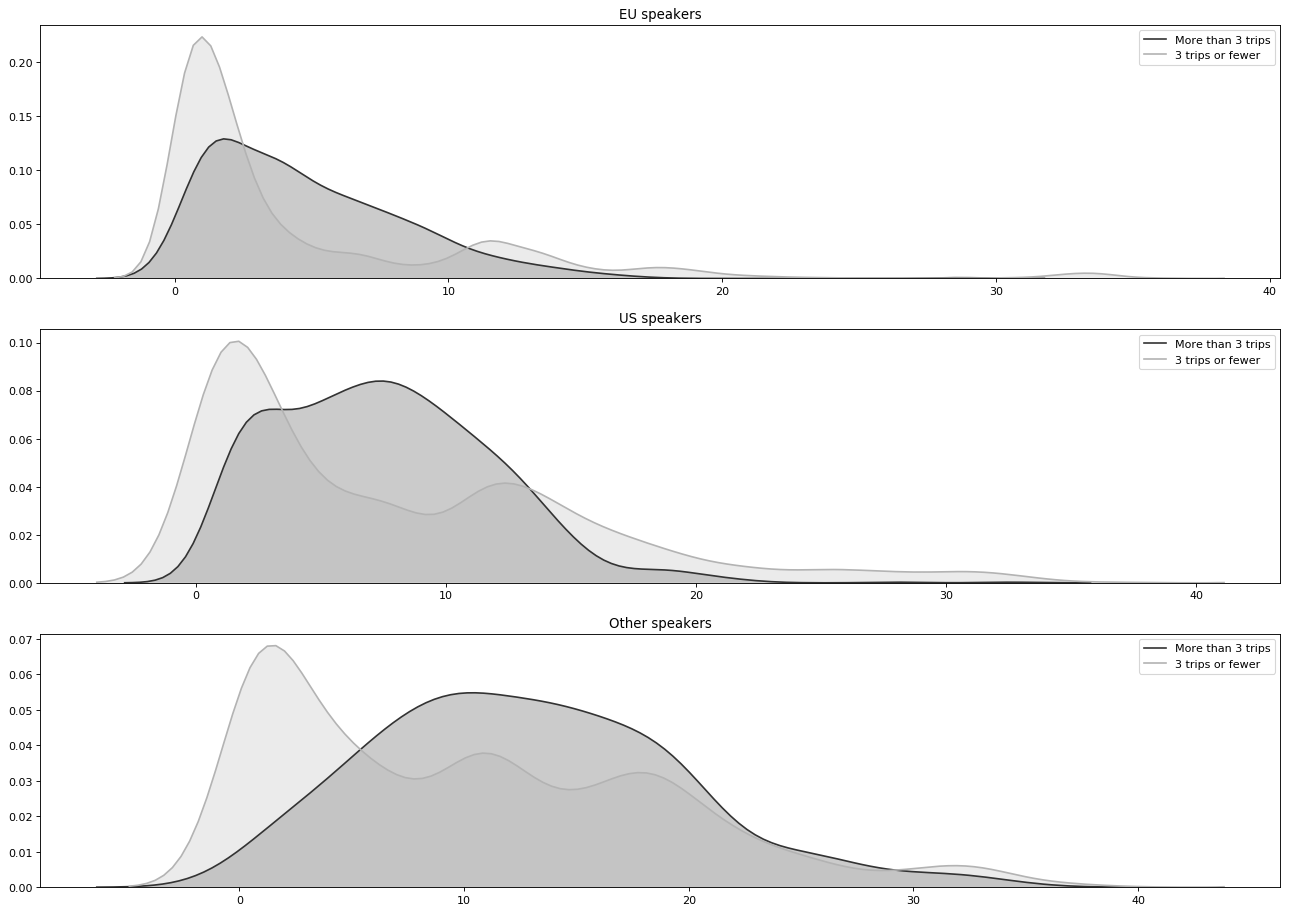

In [12]:

# density curves - FIGURE1
from pylab import *

aggregate_full=df.groupby('fuzzy_speaker').agg({'distance':'mean','id':'count','year_y':'mean','presentations':'mean',
                          'speaker_eu':'mean','speaker_us':'mean','speaker_other':'mean'})
aggregate_full.columns=['distance','number_of_trips','year','conference_size','speaker_eu','speaker_us','speaker_other']
aggregate_full=aggregate_full.dropna()
aggregate_full['speaker_region']=np.where((aggregate_full['speaker_us']==1),0,np.where((aggregate_full['speaker_eu']==1),1,2))
aggregate_full['speaker_region']=pd.factorize(aggregate_full['speaker_region'])[0]


matplotlib.rcParams.update({'font.size': 16})
plt.style.use('default')


#plt.subplots(3, 1)
figure(figsize=(20, 14), dpi=80)
custom_ylim = (0, 0.2)
#plt.suptitle('Distance travelled by frequent and less frequent travellers', fontsize=14)
plt.subplot(3,1,1)
g=sns.kdeplot(aggregate_full['distance'][(aggregate_full['speaker_eu']==1) & (aggregate_full['number_of_trips']>3)], color="0.2", shade=True,label='More than 3 trips')
g=sns.kdeplot(aggregate_full['distance'][(aggregate_full['speaker_eu']==1) & (aggregate_full['number_of_trips']<=3)], color="0.7", shade=True,label='3 trips or fewer')

plt.title('EU speakers')
#g.set(ylim=(0, 0.25))
#plt.show()

#figure(figsize=(20, 14), dpi=80)
plt.subplot(3,1,2)
g=sns.kdeplot(aggregate_full['distance'][(aggregate_full['speaker_us']==1) & (aggregate_full['number_of_trips']>3)], color="0.2", shade=True,label='More than 3 trips')
g=sns.kdeplot(aggregate_full['distance'][(aggregate_full['speaker_us']==1) & (aggregate_full['number_of_trips']<=3)], color="0.7", shade=True,label='3 trips or fewer')
plt.title('US speakers')
#g.set(ylim=(0, 0.25))
#plt.show()

#figure(figsize=(20, 14), dpi=80)
plt.subplot(3,1,3)
g=sns.kdeplot(aggregate_full['distance'][(aggregate_full['speaker_other']==1) & (aggregate_full['number_of_trips']>3)], color="0.2", shade=True,label='More than 3 trips')
g=sns.kdeplot(aggregate_full['distance'][(aggregate_full['speaker_other']==1) & (aggregate_full['number_of_trips']<=3)], color="0.7", shade=True,label='3 trips or fewer')
plt.title('Other speakers')
#g.set(ylim=(0, 0.25))


# Table 2

In [13]:
cross=df.groupby(['link','venue_region']).agg({'speaker_us':'sum','speaker_eu':'sum','speaker_other':'sum','venue_us':'mean','venue_eu':'mean','venue_other':'mean'},axis=0)
cross['presentations']=cross['speaker_us']+cross['speaker_eu']+cross['speaker_other']
cross['venue_reg']=np.where(cross['venue_us']==1,1,np.where(cross['venue_eu']==1,2,3))
cross2=cross.groupby(['venue_reg']).agg({'presentations':'sum','speaker_eu':'sum','speaker_us':'sum','speaker_other':'sum'})
cross2['us_perc']=cross2['speaker_us']/cross2['presentations']
cross2['eu_perc']=cross2['speaker_eu']/cross2['presentations']
cross2['other_perc']=cross2['speaker_other']/cross2['presentations']
cross2=cross2[['us_perc','eu_perc','other_perc']]
cross2.rename(index={1:'US venue',2:'EU venue',3:'Other venue'}, inplace=True)
cross2=round(cross2,3)
cross2

,us_perc,eu_perc,other_perc
venue_reg,,,
US venue,0.638,0.187,0.175
EU venue,0.260,0.592,0.148
Other venue,0.319,0.171,0.510


# Figure 2

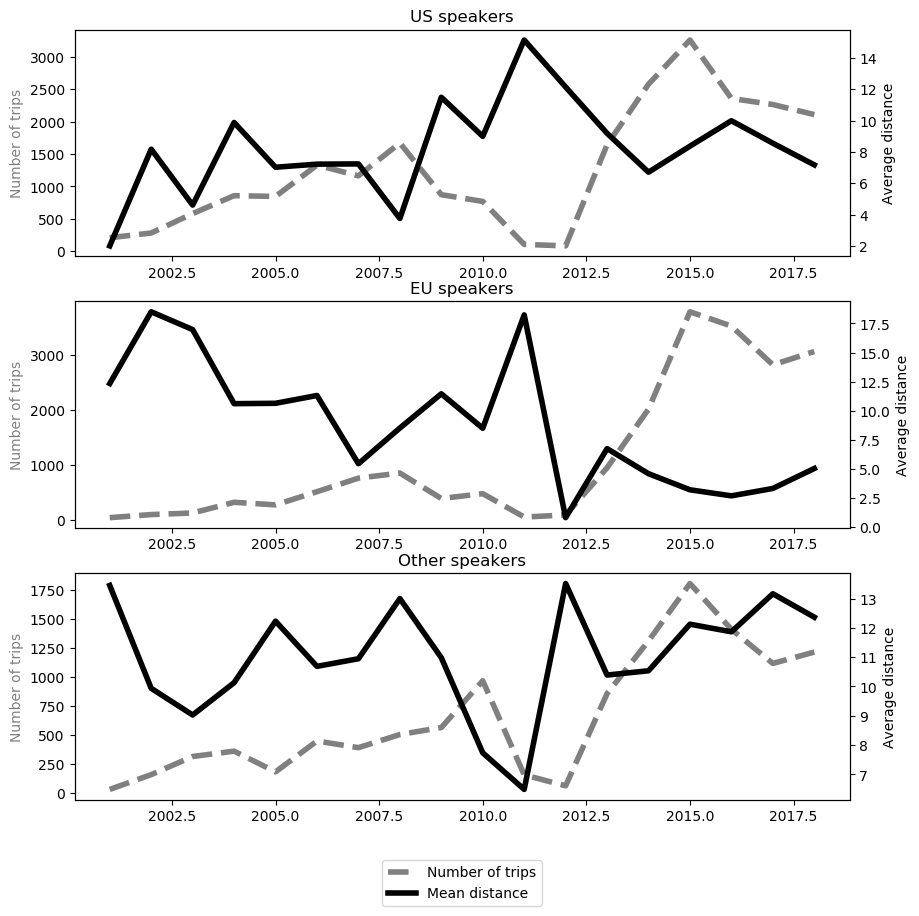

In [18]:
time=df.groupby(['fuzzy_speaker']).agg({'id':'count','distance':'mean'})
time2=df.groupby(['year_y','speaker_region']).agg({'id':'count','distance':'mean'}).unstack()
time2.columns=['trips_us','trips_eu','trips_other','dist_us','dist_eu','dist_other']
time2['year']=time2.index

plt.style.use('default')


fig, ax1 = plt.subplots(figsize=(10,10))

ax1 = plt.subplot(311)
#figure(figsize=(20, 14), dpi=80)

ax2 = ax1.twinx()
ax1.plot('year', 'trips_us', data=time2, color="0.5",linestyle='dashed',lw=4)
ax2.plot('year', 'dist_us', data=time2,color="0",lw=4)
ax1.set_title('US speakers')
ax1.set_ylabel('Number of trips', color="0.5")
ax2.set_ylabel('Average distance', color="0")

ax1 = plt.subplot(312)
#figure(figsize=(20, 14), dpi=80)

ax2 = ax1.twinx()
ax1.plot('year', 'trips_eu', data=time2, color="0.5",linestyle='dashed',lw=4)
ax2.plot('year', 'dist_eu', data=time2,color="0",lw=4)
ax1.set_title('EU speakers')
ax1.set_ylabel('Number of trips', color="0.5")
ax2.set_ylabel('Average distance', color="0")

ax1 = plt.subplot(313)
#figure(figsize=(20, 14), dpi=80)

ax2 = ax1.twinx()
ax1.plot('year', 'trips_other', data=time2, color="0.5",linestyle='dashed',lw=4,label='Number of trips')
ax2.plot('year', 'dist_other', data=time2,color="0",lw=4,label='Mean distance')
ax1.set_title('Other speakers')
ax1.set_ylabel('Number of trips', color="0.5")
ax2.set_ylabel('Average distance', color="0")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=8, bbox_to_anchor=(0.5, -0.5))

# Tables 3-4

In [14]:
total_em = df.groupby('venue_region').agg({'co2_med2':'sum','co2_opt2':'sum','co2_pes2':'sum'}).T
total_em.loc[:,'Total']= round(total_em.sum(axis=1))
total_em=total_em[['Total',0,1,2]]
total_em.rename(columns={'Total':'All venues',0:'US venues',1:'EU venues',2:'Other venues'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
total_em=round(total_em,2)
total_em

venue_region,All venues,US venues,EU venues,Other venues
Average,49406.0,16228.02,19275.72,13902.19
Optimistic,34389.0,11295.60,13416.97,9676.70
Pessimistic,78866.0,25904.59,30769.59,22191.90


In [15]:
# Per conference CO2

total_em2=df.groupby(['link']).agg({'co2_med2':'sum','co2_opt2':'sum','co2_pes2':'sum','venue_region':'mean'})
total_em2_2=total_em2.groupby('venue_region').agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).T
total_em2_3=pd.DataFrame(total_em2.agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).unstack())
total_em_conf=pd.concat([total_em2_3,total_em2_2],axis=1)
total_em_conf.rename(columns={'Total':'All venues',0:'US venues',1:'EU venues',2:'Other venues'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
total_em_conf=round(total_em_conf,2)
total_em_conf

US venues  US venues  EU venues  Other venues
Average     mean     187.86     163.92     180.15        243.90
            std      196.53     165.15     209.11        214.18
Optimistic  mean     130.76     114.10     125.39        169.77
            std      136.79     114.96     145.55        149.08
Pessimistic mean     299.87     261.66     287.57        389.33
            std      313.71     263.63     333.80        341.90

In [16]:
presentation_em=df.groupby('venue_region').agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).T
presentation_em2=pd.DataFrame(df.agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).unstack())
presentation_em=pd.concat([presentation_em2,presentation_em],axis=1)
presentation_em.rename(columns={'Total':'All venues',0:'US venues',1:'EU venues',2:'Other venues'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
presentation_em=round(presentation_em,2)
presentation_em

US venues  US venues  EU venues  Other venues
Average     mean       0.90       0.75       0.78          1.60
            std        0.98       0.83       0.86          1.29
Optimistic  mean       0.63       0.52       0.54          1.11
            std        0.68       0.58       0.60          0.90
Pessimistic mean       1.43       1.20       1.24          2.55
            std        1.56       1.32       1.37          2.06

In [61]:
total_em_sp=df.groupby('region').agg({'co2_med2':['sum'],'co2_opt2':['sum'],'co2_pes2':['sum']}).T
total_em_sp.rename(columns={'Total':'All venues',0:'US speaker',1:'EU speaker',2:'Other speaker'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
total_em_sp=round(total_em_sp,2)
total_em_sp

,region,US speaker,EU speaker,Other speaker
Average,sum,21764.95,11723.38,15918.28
Optimistic,sum,15149.62,8160.12,11080.01
Pessimistic,sum,34743.12,18713.88,25410.15


In [63]:
total_em_sp2=df.groupby('region').agg({'co2_med2':['mean','std'],'co2_opt2':['mean','std'],'co2_pes2':['mean','std']}).T
total_em_sp2.rename(columns={'Total':'All venues',0:'US speaker',1:'EU speaker',2:'Other speaker'},index={'co2_med2':'Average','co2_opt2':'Optimistic','co2_pes2':'Pessimistic'}, inplace=True)
total_em_sp2=round(total_em_sp2,2)
total_em_sp2

region            US speaker  EU speaker  Other speaker
Average     mean        0.95        0.58           1.34
            std         0.92        0.81           1.15
Optimistic  mean        0.66        0.40           0.93
            std         0.64        0.57           0.80
Pessimistic mean        1.51        0.93           2.14
            std         1.46        1.30           1.83

In [20]:
df_short=df[(df['keeping']==1)].copy()

citations=df_short.groupby(['speaker_region','venue_region']).agg({'citation_y2':'mean'},axis=0).unstack()
citations.columns=['venue_US','venue_EU','venue_other']
citations.rename(index={0:'speaker_US',1:'speaker_EU',2:'speaker_other'}, inplace=True)
citations


,venue_US,venue_EU,venue_other
speaker_region,,,
speaker_US,4.412706,3.735582,3.656826
speaker_EU,2.447977,1.645513,2.111468
speaker_other,2.011565,1.205221,1.330785


In [21]:
citations2=df_short.groupby(['speaker_region','venue_region']).agg({'speaker_cit2':'mean'},axis=0).unstack()
citations2.columns=['venue_US','venue_EU','venue_other']
citations2.rename(index={0:'speaker_US',1:'speaker_EU',2:'speaker_other'}, inplace=True)
citations2

,venue_US,venue_EU,venue_other
speaker_region,,,
speaker_US,272.244028,340.155630,325.837486
speaker_EU,173.249074,189.988987,240.731873
speaker_other,130.172390,117.879126,110.722227


## Table 7

In [30]:
df_short=df[(df['keeping']==1)].copy()

aggregate=df_short.groupby(['fuzzy_speaker'],group_keys=True).agg({'citation_y':'sum','citation_y2':'sum','distance':'mean',
                          'id':'count','year_y':'mean','presentations':'mean','speaker_us':'mean',
                          'speaker_eu':'mean','speaker_cit':'sum','speaker_cit2':'sum',
                          'speaker_pub':'mean', 'speaker_pub2':'mean','total_cit':'mean'})
aggregate.columns=['citations','citations2','distance','number_of_trips','year','conference_size','speaker_us',
                   'speaker_eu','speaker_cit','speaker_cit2','speaker_pub','speaker_pub2','total_cit']
aggregate=aggregate.dropna()

aggregate['speaker_cit3']=(aggregate['speaker_cit2']-aggregate['citations2'])
#aggregate['speaker_cit3']=np.nan_to_num(aggregate['speaker_cit3'])



# standardising
from sklearn import preprocessing
aggregate_std=aggregate.copy()
aggregate_std['citations']=preprocessing.scale(aggregate_std['citations'])
aggregate_std['citations2']=preprocessing.scale(aggregate_std['citations2'])

aggregate_std['distance']=preprocessing.scale(aggregate_std['distance'])
aggregate_std['number_of_trips']=preprocessing.scale(aggregate_std['number_of_trips'])
aggregate_std['conference_size']=preprocessing.scale(aggregate_std['conference_size'])
aggregate_std['speaker_cit']=preprocessing.scale(aggregate_std['speaker_cit'])
aggregate_std['speaker_cit2']=preprocessing.scale(aggregate_std['speaker_cit2'])
aggregate_std['speaker_cit3']=preprocessing.scale(aggregate_std['speaker_cit3'])

aggregate_std['speaker_pub']=preprocessing.scale(aggregate_std['speaker_pub'])
aggregate_std['speaker_pub2']=preprocessing.scale(aggregate_std['speaker_pub2'])

aggregate_std['total_cit']=preprocessing.scale(aggregate_std['total_cit'])


# running ols

import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.iolib.summary2 import summary_col


model1 = sm.ols(formula = 'citations2 ~  distance +  number_of_trips  + speaker_cit3 +  conference_size +  speaker_us + speaker_eu  +(distance*speaker_us* speaker_cit3) +(distance*speaker_eu* speaker_cit3) + (number_of_trips * speaker_us * speaker_cit3) + (number_of_trips * speaker_eu * speaker_cit3) + (distance * speaker_cit3) + (number_of_trips * speaker_cit3)', 
               data = aggregate_std).fit(cov_type='HC1')
model2 = sm.ols(formula = 'citations2 ~  distance +  number_of_trips  + speaker_cit3 +  conference_size +  speaker_us + speaker_eu  ', 
               data = aggregate_std).fit(cov_type='HC1')
model3 = sm.ols(formula = 'citations2 ~  distance +  number_of_trips + speaker_cit3  ', data = aggregate_std).fit(cov_type='HC1')
model4 = sm.ols(formula = 'citations2 ~  distance +  number_of_trips   +  conference_size +  speaker_us + speaker_eu  + (distance*speaker_us) + (distance*speaker_eu) + (number_of_trips*speaker_us) + (number_of_trips*speaker_eu)', 
               data = aggregate_std).fit(cov_type='HC1')

model1.summary()

dfoutput = summary_col([model1,model2,model3,model4],stars=True,info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})

dfoutput

C:\Users\peter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,citations2 I,citations2 II,citations2 III,citations2 IIII
Intercept,-0.1225***,-0.0859***,-0.0000,-0.1249***
,(0.0122),(0.0088),(0.0073),(0.0114)
R-squared,0.1446,0.1307,0.1211,0.1081
,0.1455,0.1310,0.1213,0.1086
conference_size,-0.0121**,-0.0147***,,-0.0105**
,(0.0048),(0.0048),,(0.0048)
distance,-0.0054,-0.0035,0.0029,-0.0049
,(0.0064),(0.0055),(0.0051),(0.0051)
distance:speaker_cit3,-0.0030,,,
,(0.0283),,,


## Figure 3

Coefficients: 
 [-0.00543724  0.13910311 -0.01212654  0.24327048  0.03702422  0.05755553
 -0.00633795  0.02594927  0.19017727 -0.00957225 -0.00297075  0.03565889
  0.18953495  0.01102131  0.0122943  -0.05858511 -0.04277684  0.00064277]


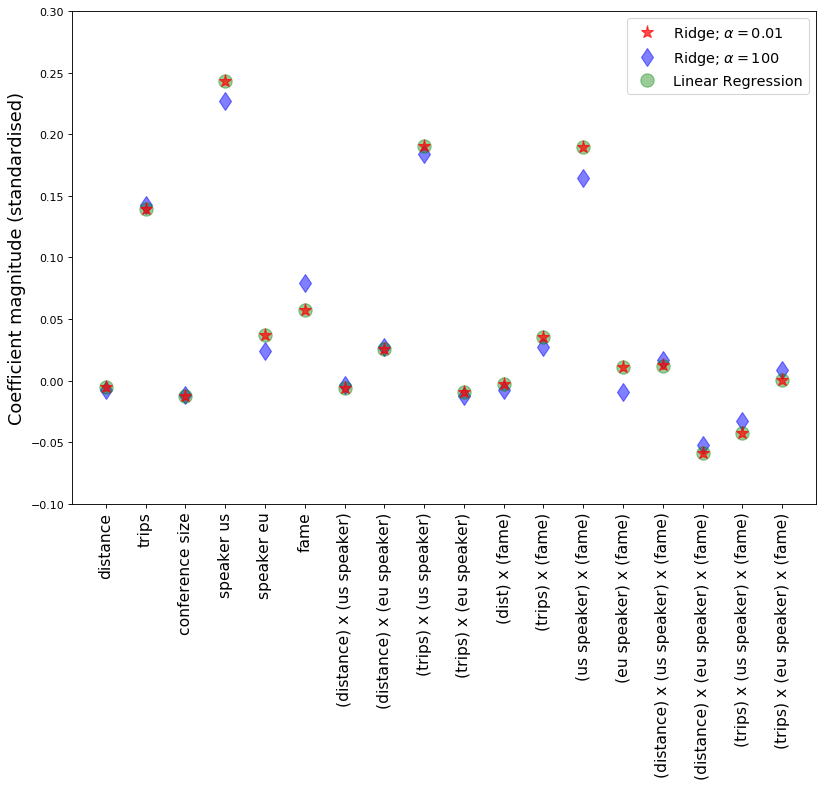

In [31]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()


df_rt=aggregate_std.copy() # ridge assumes that the predictors are standardised
del df_rt['citations']
del df_rt['speaker_cit']
del df_rt['speaker_cit2']

del df_rt['speaker_pub']
del df_rt['speaker_pub2']

del df_rt['total_cit']

df_rt['distance_us_speaker']=df_rt['distance']*df_rt['speaker_us']
df_rt['distance_eu_speaker']=df_rt['distance']*df_rt['speaker_eu']
df_rt['trips_us_speaker']=df_rt['number_of_trips']*df_rt['speaker_us']
df_rt['trips_eu_speaker']=df_rt['number_of_trips']*df_rt['speaker_eu']
df_rt['dist_speaker_cit']=df_rt['distance']*df_rt['speaker_cit3']
df_rt['trips_speaker_cit']=df_rt['number_of_trips']*df_rt['speaker_cit3']
df_rt['us_speaker_cit']=df_rt['speaker_us']*df_rt['speaker_cit3']
df_rt['eu_speaker_cit']=df_rt['speaker_eu']*df_rt['speaker_cit3']

df_rt['distance_us_speaker_cit']=df_rt['distance']*df_rt['speaker_us']*df_rt['speaker_cit3']
df_rt['distance_eu_speaker_cit']=df_rt['distance']*df_rt['speaker_eu']*df_rt['speaker_cit3']
df_rt['trips_us_speaker_cit']=df_rt['number_of_trips']*df_rt['speaker_us']*df_rt['speaker_cit3']
df_rt['trips_eu_speaker_cit']=df_rt['number_of_trips']*df_rt['speaker_eu']*df_rt['speaker_cit3']


labels = np.array(df_rt['citations2'])
df_rt = df_rt.drop('citations2', axis = 1)
df_rt = df_rt.drop(['year'], axis = 1)
#df_rt = df_rt.drop(['distance','distance_us_speaker','distance_eu_speaker','year'], axis = 1)

#df_rt=df_rt.iloc[:,:]
# Saving feature names for later use
feature_names = list(df_rt.columns)
features=['distance', 'trips','conference size', 'speaker us', 'speaker eu','fame',  '(distance) x (us speaker)',
          '(distance) x (eu speaker)', '(trips) x (us speaker)', '(trips) x (eu speaker)','(dist) x (fame)',
          '(trips) x (fame)', '(us speaker) x (fame)','(eu speaker) x (fame)','(distance) x (us speaker) x (fame)',
          '(distance) x (eu speaker) x (fame)',
          '(trips) x (us speaker) x (fame)','(trips) x (eu speaker) x (fame)']
#features=['null']+feature_names
# Convert to numpy array
#df_rt = np.array(df_rt)

X_train, X_test, y_train, y_test  = train_test_split(df_rt, labels, test_size = 0.3, random_state = 10)


lr.fit(df_rt, labels)
print('Coefficients: \n', lr.coef_)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(df_rt, labels)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(df_rt, labels)

#train_score=lr.score(X_train, y_train)
#test_score=lr.score(X_test, y_test)
#Ridge_train_score = rr.score(X_train,y_train)
#Ridge_test_score = rr.score(X_test, y_test)
#Ridge_train_score100 = rr100.score(X_train,y_train)
#Ridge_test_score100 = rr100.score(X_test, y_test)
#print( "linear regression train score:", train_score)
#print( "linear regression test score:", test_score)
#print('ridge regression train score low alpha:', Ridge_train_score)
#print("ridge regression test score low alpha:", Ridge_test_score)
#print("ridge regression train score high alpha:", Ridge_train_score100)
#print("ridge regression test score high alpha:", Ridge_test_score100)

x = range(len(feature_names))
axes = figure(figsize=(12, 8), dpi=80).add_subplot(111)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=12,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=12,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=12,color='green',label='Linear Regression')
#plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient magnitude (standardised)',fontsize=16)
plt.ylim(-0.1, 0.30)
plt.legend(fontsize=13,loc=1)
plt.xticks(x,features, rotation='vertical',fontsize=14)
plt.show()

# Tables 9-10

In [36]:
venue_country=df.groupby('venue_country').agg({'distance':'mean','link': pd.Series.nunique,'speaker':'count'})
venue_country


,distance,link,speaker
venue_country,,,
Argentina,17.926621,1,197
Australia,15.242696,13,2006
Austria,1.448814,1,48
Belgium,5.032027,1,272
Brazil,7.614960,7,735
Canada,7.370355,11,4408
Chile,10.322937,6,524
China,3.426730,1,1
Cte dIvoire,7.852547,1,76


In [37]:
speaker_country=df.groupby('speaker_country').agg({'distance':'mean','link': pd.Series.nunique,'speaker':'count'})
drop=['Africa','Chome','Kamiiawase','','Ariel','BB','Birzeit','CN','Central America','Gazimausa','Kalkanl','Kalimantan','Karaman','MBA','Xiangzhou','land Islands']
speaker_country=speaker_country[~speaker_country.index.isin(drop)]
speaker_country=speaker_country[speaker_country['speaker']>=50]
speaker_country

,distance,link,speaker
speaker_country,,,
Argentina,11.692723,26,50
Australia,13.015576,173,1609
Austria,4.340757,97,317
Belgium,5.408884,144,532
Brazil,8.191582,93,734
Canada,7.499127,234,3010
Chile,8.559719,79,348
China,13.429245,40,70
Colombia,13.091627,57,87


In [35]:
##TABLE 13

In [33]:
df_short=df[(df['keeping']==1)].copy()
df_inv=df[(df['keeping']==0)].copy()

#df_inv=df.copy()

aggregate=df_short.groupby('fuzzy_speaker').agg({'distance':'mean','co2_med2':'mean','id':'count','year_y':'mean',
                          'presentations':'mean','venue_eu':'mean','speaker_eu':'mean','venue_us':'mean',
                          'speaker_us':'mean','venue_other':'mean','speaker_other':'mean'})
aggregate.columns=['distance','co2','number_of_trips','year','conference_size','eu_venue','eu_speaker',
                   'us_venue','us_speaker','other_venue','other_speaker']
aggregate=aggregate.dropna()


aggregate_inv=df_inv.groupby('fuzzy_speaker').agg({'distance':'mean','co2_med':'mean','id':'count','year_y':'mean',
                            'presentations':'mean','venue_eu':'mean','speaker_eu':'mean','venue_us':'mean',
                          'speaker_us':'mean','venue_other':'mean','speaker_other':'mean'})
aggregate_inv.columns=['distance','co2','number_of_trips','year','conference_size','eu_venue','eu_speaker',
                   'us_venue','us_speaker','other_venue','other_speaker']
aggregate_inv=aggregate_inv.dropna()
#aggregate_inv=aggregate_inv[aggregate_inv['speaker_other']==1]
#aggregate=aggregate[aggregate['speaker_other']==1]
import scipy.stats as stats
import statistics

sample=[]
sample_inv=[]
for column in aggregate:
    mean=round(statistics.mean(aggregate[column]),3)
    sd=str('('+str(round(statistics.stdev(aggregate[column]),3))+')')
    test=stats.ttest_ind(a= aggregate[column], b= aggregate_inv[column],equal_var=False)
    tstat=round(test[0],3)
    pval=round(test[1],3)
    sample.append(mean)
    sample.append(sd)
    sample.append(pval)


for column in aggregate_inv:
    mean=round(statistics.mean(aggregate_inv[column]),3)
    sd=str('('+str(round(statistics.stdev(aggregate_inv[column]),3))+')')
    test=stats.ttest_ind(a= aggregate_inv[column], b= aggregate[column],equal_var=False)
    tstat=round(test[0],3)
    pval=round(test[1],3)
    sample_inv.append(mean)
    sample_inv.append(sd)
    sample_inv.append(pval)

descriptive=pd.concat([pd.DataFrame(sample), pd.DataFrame(sample_inv)],axis=1)
descriptive=descriptive.rename(index={0: "distance", 1: "std", 2:'pval',3: "co2_average",4: "std",5:'pval',
                                      6: "number of trips",7: "std",8:'pval',9: "year",10:'std',11:'pval',
                                      12:'conference_size',13:'std',14:'pval',15:'venue_eu',16:'std',17:'pval',
                                      18:'speaker_eu',19:'std',20:'pval',21:'venue_us',22:'std',23:'pval',
                                      24:'speaker_us',25:'std',26:'pval',27:'venue_other',28:'std',29:'pval',
                                      30:'speaker_other',31:'std'})
descriptive

,0,0
distance,7.434,7.444
std,(7.217),(7.732)
pval,0.901,0.901
co2_average,0.894,0.892
std,(0.902),(0.941)
pval,0.848,0.848
number of trips,1.908,1.465
std,(1.622),(0.959)
pval,0,0
year,2012.62,2013.58
